In [1]:
!pip install fiftyone

In [2]:
!pip install torch torchvision umap-learn

In [4]:
!pip install "notebook>=6,<7" "ipywidgets>=8,<9"

In [7]:
import fiftyone as fo
import fiftyone.zoo as foz
from fiftyone import ViewField as F
from PIL import Image
import matplotlib.pyplot as plt
import fiftyone.brain as fob
import cv2
import numpy as np

In [8]:
empty_dataset=fo.Dataset()

In [9]:
print(empty_dataset)

Name:        2024.04.10.16.45.03
Media type:  None
Num samples: 0
Persistent:  False
Tags:        []
Sample fields:
    id:       fiftyone.core.fields.ObjectIdField
    filepath: fiftyone.core.fields.StringField
    tags:     fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.Metadata)


In [10]:
folder_path="C://Users/dell/Desktop/dataset/dataset/Good"

In [11]:
dataset_type=fo.types.ImageDirectory()

In [12]:
dataset_good=fo.Dataset.from_dir(folder_path,dataset_type=dataset_type)

 100% |███████████████| 2200/2200 [1.2s elapsed, 0s remaining, 1.9K samples/s]         


In [13]:
sample=dataset_good.first()

In [14]:
image_path=sample.filepath
image=Image.open(image_path)

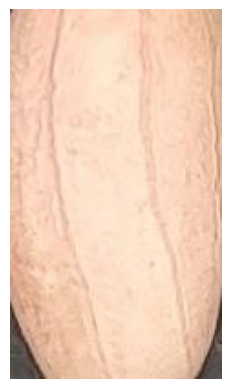

In [15]:
plt.imshow(image)
plt.axis('off')
plt.show()

In [16]:
folder_paths="C://Users/dell/Desktop/dataset/dataset/SkinOut"

In [17]:
dataset_type=fo.types.ImageDirectory()

In [18]:
dataset_skinout=fo.Dataset.from_dir(folder_paths,dataset_type=dataset_type)

 100% |███████████████| 2200/2200 [1.0s elapsed, 0s remaining, 2.1K samples/s]         


In [19]:
sample_skinout=dataset_skinout.first()

In [20]:
image_path=sample_skinout.filepath
image=Image.open(image_path)

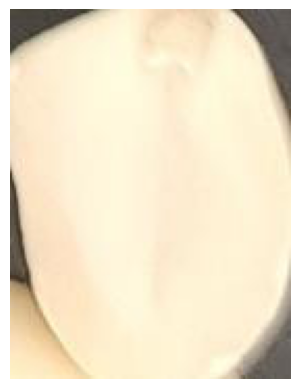

In [21]:
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
folder_path="C://Users/dell/Desktop/dataset/dataset"
dataset_type=fo.types.ImageDirectory()
dataset=fo.Dataset.from_dir(folder_path,dataset_type=dataset_type)
fixed_size=(100,100)
image_array=[cv2.resize(cv2.imread(f,-1),fixed_size).ravel()
                    for f in dataset.values("filepath")]
embeddings=np.array(image_array)

results=fob.compute_visualization(dataset,embeddings=embeddings,num_dim=2,method="umap",brain_key=None,verbose=True)
fob.compute_uniqueness(dataset)

uniqueness=dataset.values("uniqueness")
plot=results.visualize(labels=uniqueness)
plot.show(height=720)
session=fo.launch_app()
session.dataset=dataset
session.plots.attach(plot)

In [ ]:
session.freeze()

In [ ]:
pip install -U fiftyone albumentations

In [ ]:
!fiftyone plugins download https://github.com/jacobmarks/fiftyone-albumentations-plugin

In [ ]:
pip install -U transformers ultralytics

In [ ]:
import albumentations as A

In [ ]:
from transformers import AutoModelForDepthEstimation

depth_model=AutoModelForDepthEstimation.from_pretrained("Intel/dpt-large")
dataset.apply_model(depth_model,"depth")

from ultralytics import YOLO
pose_model=YOlO('yolov8x-pose.pt')
dataset.apply_model(pose_model,"keypoints")

In [ ]:
!pip install tensorflow

In [ ]:
session.view=dataset.take(10)

In [ ]:
sample_ids=session.selected

In [ ]:
selected_view=dataset.select(session.selected)

In [ ]:
session.view=selected_view

In [ ]:
session.dataset=dataset

In [ ]:
folder_path="C://Users/dell/Desktop/dataset/dataset"
dataset_type=fo.types.ImageDirectory()
dataset=fo.Dataset.from_dir(folder_path,dataset_type=dataset_type)
import fiftyone.core.utils as fou

for sample in dataset:
    sample["file_hash"]=fou.compute_filehash(sample.filepath)
    sample.save()
print(dataset)

In [ ]:
sample=dataset.first()
print(sample)

In [ ]:
session.dataset=dataset   #refress app and toggle on the new file_hash field

In [ ]:
from collections import Counter
filehash_counts=Counter(sample.file_hash for sample in dataset)
dup_filehashes=[k for k ,v in filehash_counts.items() if v>1]
print("Number of duplicate file hashes:%d" % len(dup_filehashes))

In [ ]:
dup_view=(dataset.match(F("file_hash").is_in (dup_filehashes).sort_by("file_hash")))
print("Number of images that have a duplicate:%d" % len(dup_view))
print("Number of duplicated:%d" %(len(dup_view)-len(dup_fileflashness)))

In [ ]:
session.view=dup_view